<a href="https://colab.research.google.com/github/OtavioCarvalho1/Time_Series/blob/main/time_series_SHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/OtavioCarvalho1/Time_Series.git

Cloning into 'Time_Series'...
remote: Enumerating objects: 1247, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1247 (delta 0), reused 0 (delta 0), pack-reused 1244
Receiving objects: 100% (1247/1247), 169.32 MiB | 19.31 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Checking out files: 100% (1208/1208), done.


In [3]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.5MB 449kB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# Aplicação do algoritmo ao estado de referência

In [4]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from math import sqrt

from statsmodels.tsa.ar_model import AutoReg

from statistics import stdev

**1.1** Importação do sinal utilizado no TREINAMENTO

In [5]:
Names = ['Tempo [s]', 'Amplitude PZT Atuador', 'Amplitude PZT Sensor']

df_train = pd.read_csv("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_150KHz__5ciclos_B3_A3.csv", names=Names)

df_train.head()

,Tempo [s],Amplitude PZT Atuador,Amplitude PZT Sensor
0,0.000000e+00,-0.000182,0.000000e+00
1,1.000000e-07,-0.000067,0.000000e+00
2,2.000000e-07,0.000169,0.000000e+00
3,3.000000e-07,-0.000112,0.000000e+00
4,4.000000e-07,-0.000063,1.000000e-08


**1.2** Importação do sinal utilizado no TESTE

In [6]:
df_test = pd.read_csv("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_2_150KHz__5ciclos_B3_A3.csv", names=Names)

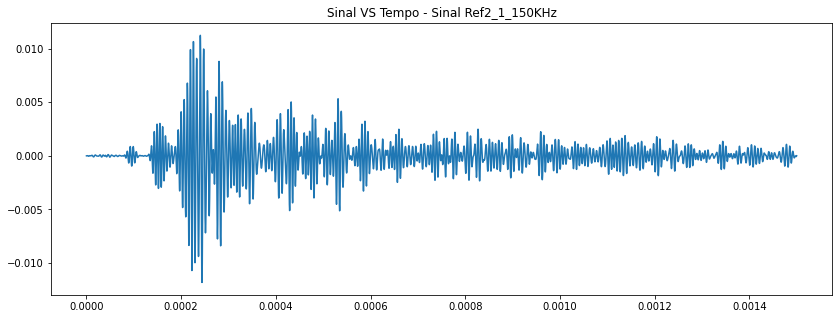

In [7]:
# plot do sinal (sinal do PZT sensor vs tempo)
plt.figure(figsize=(14,5))
plt.plot(df_train['Tempo [s]'], df_train['Amplitude PZT Sensor'])
plt.title('Sinal VS Tempo - Sinal Ref2_1_150KHz')
plt.show()

**2** "Normalização"

OBS: Como discutido, a operação vista no trabalho do autor Wagner Cano parece ser mais um standardization do que normalização. Portanto, nesse caso, faço aqui a "standardização do sinal", a seguir.

<function matplotlib.pyplot.show>

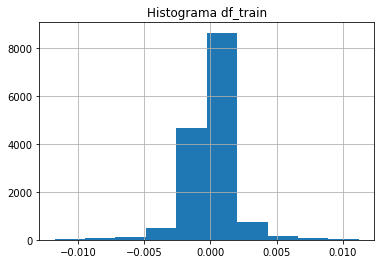

In [8]:
# Plot do histograma de valores do sinal df_train['Amplitude PZT Sensor']
df_train [['Amplitude PZT Sensor']].hist()
plt.title('Histograma df_train')
plt.show

In [9]:
# Standardization do dado de treinamento (df_train)
scaler = StandardScaler()

scaler = scaler.fit(df_train[['Amplitude PZT Sensor']])
print('Média: %f, Desvio Padrão: %f' % (scaler.mean_, sqrt(scaler.var_)))

headers = ['Amplitude PZT Sensor']

df_train_std = pd.DataFrame(scaler.transform(df_train[['Amplitude PZT Sensor']]), columns=headers)
coluna_tempo = df_train['Tempo [s]']
df_train_std = df_train_std.join(coluna_tempo)
df_train_std = df_train_std[['Tempo [s]', 'Amplitude PZT Sensor']] # organiza a ordem das colunas

# df_train após standardization
df_train_std.head(10)


Média: -0.000000, Desvio Padrão: 0.001791


,Tempo [s],Amplitude PZT Sensor
0,0.000000e+00,0.000064
1,1.000000e-07,0.000064
2,2.000000e-07,0.000064
3,3.000000e-07,0.000064
4,4.000000e-07,0.000070
5,5.000000e-07,0.000087
6,6.000000e-07,0.000120
7,7.000000e-07,0.000182
8,8.000000e-07,0.000282
9,9.000000e-07,0.000450


In [10]:
# Standardization do dado de teste (df_test)
scaler = StandardScaler()

scaler = scaler.fit(df_test[['Amplitude PZT Sensor']])
print('Média: %f, Desvio Padrão: %f' % (scaler.mean_, sqrt(scaler.var_)))

headers = ['Amplitude PZT Sensor']

df_test_std = pd.DataFrame(scaler.transform(df_test[['Amplitude PZT Sensor']]), columns=headers)
coluna_tempo = df_test['Tempo [s]']
df_test_std = df_test_std.join(coluna_tempo)
df_test_std = df_test_std[['Tempo [s]', 'Amplitude PZT Sensor']] # organiza a ordem das colunas

# df_test após standardization
df_test_std.head(10)

Média: -0.000000, Desvio Padrão: 0.001789


,Tempo [s],Amplitude PZT Sensor
0,0.000000e+00,0.000055
1,1.000000e-07,0.000055
2,2.000000e-07,0.000055
3,3.000000e-07,0.000055
4,4.000000e-07,0.000066
5,5.000000e-07,0.000083
6,6.000000e-07,0.000122
7,7.000000e-07,0.000200
8,8.000000e-07,0.000340
9,9.000000e-07,0.000564


**3** Isolamento do subframe de análise, entre 200 e 230 microssegundos. 

OBS: Segundo o autor, este é o melhor trecho para se observar as ondas A0, que interagem melhor com o tipo de "dano" na placa do experimento.

In [11]:
df_train_std_A0 = df_train_std.iloc[2000:2300]

df_train_std_A0.head()

,Tempo [s],Amplitude PZT Sensor
2000,0.0002,2.293469
2001,0.0002,2.269810
2002,0.0002,2.223110
2003,0.0002,2.153578
2004,0.0002,2.061643


Alterando o índice do subset para começar em 0, envitando assim problemas ao aplicar os algoritmos AR e ARX

In [12]:
df_train_std_A0 = df_train_std_A0.reset_index(drop=True)

df_train_std_A0.head()

,Tempo [s],Amplitude PZT Sensor
0,0.0002,2.293469
1,0.0002,2.269810
2,0.0002,2.223110
3,0.0002,2.153578
4,0.0002,2.061643


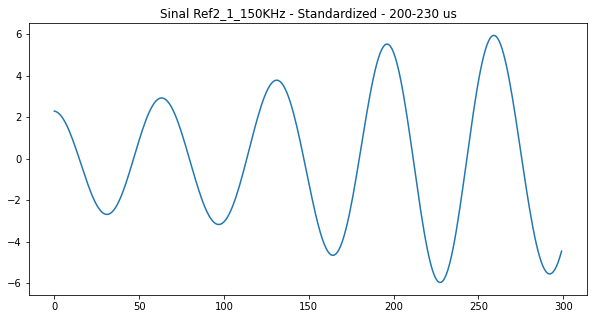

In [13]:
# Plot do subframe do sinal para treinamento
plt.figure(figsize=(10,5))
plt.plot(df_train_std_A0['Amplitude PZT Sensor'])
plt.title('Sinal Ref2_1_150KHz - Standardized - 200-230 us')
plt.show()

In [14]:
df_test_std_A0 = df_test_std.iloc[2000:2300]

df_test_std_A0 = df_test_std_A0.reset_index(drop=True)

**4** Escolha da ordem do AR utilizando o AIC e validação do modelo AR de referência



In [15]:
AIC = []
for i in range(0, 11):
  model = AutoReg(df_train_std_A0['Amplitude PZT Sensor'], 
                  lags=i, 
                  old_names=False).fit()
  AIC.append(model.aic)
print(AIC)

[2.359027648790406, -2.356481871372275, -11.82078291832983, -16.04257722228672, -22.240251284790386, -22.470489931175933, -22.580774976926755, -22.94918508600906, -23.154827155596045, -23.158761137227927, -23.212988936790683]


<function matplotlib.pyplot.show>

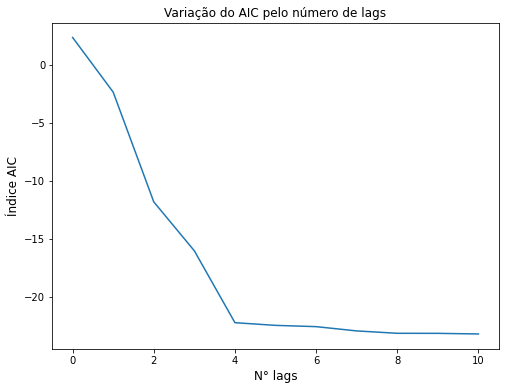

In [16]:
# plot do gráfico para escolha da ordem do modelo AR
plt.figure(figsize=(8,6))
plt.plot(range(0,11), AIC)
plt.title('Variação do AIC pelo número de lags')
plt.xlabel('N° lags', fontsize=12)
plt.ylabel('Índice AIC', fontsize=12)
plt.show

**5** Aplicação do índice de falha de Lu e Gao

OBS: abaixo segue apenas uma tentativa de entender o processo de obtenção do índice de falha apresentado no trabalho.

Obtendo os índices de falha para a condição sem dano:

In [17]:
# Definindo função para simplificar o trabalho de importar, padronizar, isolar o subframe, resetar o índice, fazer o AR(2) e criar o residual do teste avaliado e tirar seu desvio padrão.

def get_residual_std(arquivo):
  names = ['Tempo [s]', 'Amplitude PZT Atuador', 'Amplitude PZT Sensor']
  df = pd.read_csv(arquivo, names=names)
  scaler = StandardScaler()
  #transformando para DataFrame para poder aplicar o iloc
  df_std = pd.DataFrame( scaler.fit_transform(df[['Amplitude PZT Sensor']]))
  subframe = df_std.iloc[2000:2300]
  subframe = subframe.reset_index(drop=True)
  model = AutoReg(subframe[0], 
                  lags=2, 
                  old_names=False).fit()
  return stdev(model.resid)

In [18]:
# Exemplo de utilização do get_residual_std
get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_2_150KHz__5ciclos_B3_A3.csv")

0.0026914852540684884

In [19]:
# teste_semdano1 = get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_150KHz__5ciclos_B3_A3.csv") 
# teste_semdano2 = get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_2_150KHz__5ciclos_B3_A3.csv")
# teste_semdano3 = get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_3_150KHz__5ciclos_B3_A3.csv")
# teste_semdano4 = get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_4_150KHz__5ciclos_B3_A3.csv")
# teste_semdano5 = get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_5_150KHz__5ciclos_B3_A3.csv")
# teste_semdano6 = get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_6_150KHz__5ciclos_B3_A3.csv")
# teste_semdano7 = get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_7_150KHz__5ciclos_B3_A3.csv")
# teste_semdano8 = get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_8_150KHz__5ciclos_B3_A3.csv")
# teste_semdano9 = get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_9_150KHz__5ciclos_B3_A3.csv")
# teste_semdano10 = get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_10_150KHz__5ciclos_B3_A3.csv")
# teste_semdano11 = get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref3_1_150KHz__5ciclos_B3_A3.csv")
# teste_semdano12 = get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref3_2_150KHz__5ciclos_B3_A3.csv")
# teste_semdano13 = get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref3_3_150KHz__5ciclos_B3_A3.csv")
# teste_semdano14 = get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref3_4_150KHz__5ciclos_B3_A3.csv")
# teste_semdano15 = get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref3_5_150KHz__5ciclos_B3_A3.csv")
# teste_semdano16 = get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref3_6_150KHz__5ciclos_B3_A3.csv")
# teste_semdano17 = get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref3_7_150KHz__5ciclos_B3_A3.csv")
# teste_semdano18 = get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref3_8_150KHz__5ciclos_B3_A3.csv")
# teste_semdano19 = get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref3_9_150KHz__5ciclos_B3_A3.csv")
# teste_semdano20 = get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref3_10_150KHz__5ciclos_B3_A3.csv")

In [20]:
resid_semdano = [get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_150KHz__5ciclos_B3_A3.csv"), 
get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_2_150KHz__5ciclos_B3_A3.csv"),
get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_3_150KHz__5ciclos_B3_A3.csv"),
get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_4_150KHz__5ciclos_B3_A3.csv"),
get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_5_150KHz__5ciclos_B3_A3.csv"),
get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_6_150KHz__5ciclos_B3_A3.csv"),
get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_7_150KHz__5ciclos_B3_A3.csv"),
get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_8_150KHz__5ciclos_B3_A3.csv"),
get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_9_150KHz__5ciclos_B3_A3.csv"),
get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_10_150KHz__5ciclos_B3_A3.csv"),
get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref3_1_150KHz__5ciclos_B3_A3.csv"),
get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref3_2_150KHz__5ciclos_B3_A3.csv"),
get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref3_3_150KHz__5ciclos_B3_A3.csv"),
get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref3_4_150KHz__5ciclos_B3_A3.csv"),
get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref3_5_150KHz__5ciclos_B3_A3.csv"),
get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref3_6_150KHz__5ciclos_B3_A3.csv"),
get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref3_7_150KHz__5ciclos_B3_A3.csv"),
get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref3_8_150KHz__5ciclos_B3_A3.csv"),
get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref3_9_150KHz__5ciclos_B3_A3.csv"),
get_residual_std("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref3_10_150KHz__5ciclos_B3_A3.csv")]
print(resid_semdano)

[0.002679477130361082, 0.0026914852540684884, 0.002679737570817021, 0.002665280956919896, 0.0026786456239361175, 0.0026852482002553127, 0.002687373863321104, 0.002700443595699377, 0.002667174147989302, 0.002670128116386271, 0.002621337971792978, 0.002610307245969718, 0.0026427282715710404, 0.002598500586469599, 0.002626545884596724, 0.0026140825258538945, 0.002632595090804718, 0.0026410645966687125, 0.002634517875340639, 0.0026308670773244375]


In [28]:
gama = {}

for i in range(len(resid_semdano)):

    temp = []
    
    gama[i] = temp

    for j in range(0,10):
        
        temp.append(resid_semdano[i]/resid_semdano[j])

gama

{0: [1.0,
  0.9955384768728512,
  0.9999028112085395,
  1.0053263328221846,
  1.0003104204667965,
  0.9978508244065923,
  0.9970615428438144,
  0.9922359180648376,
  1.0046127405595375,
  1.0035013353544489],
 1: [1.0044815175212143,
  1.0,
  1.0043838931764821,
  1.0098317203972653,
  1.0047933291427718,
  1.0023227103597288,
  1.001529891617798,
  0.9966826407168233,
  1.0091149301583904,
  1.0079985441714017],
 2: [1.0000971982380398,
  0.9956352414587041,
  1.0,
  1.0054240487703898,
  1.0004076488771587,
  0.9979478137485511,
  0.9971584554689961,
  0.9923323616477931,
  1.0047103871478322,
  1.0035988739161157],
 3: [0.9947018866926202,
  0.9902640012205226,
  0.9946052128183891,
  1.0,
  0.9950106625166106,
  0.9925640976750238,
  0.9917789978153969,
  0.986978939743278,
  0.9992901884300157,
  0.998184671575634],
 4: [0.9996896758641666,
  0.9952295372553268,
  0.9995925172327339,
  1.005014355796721,
  1.0,
  0.9975411672118177,
  0.9967521305821587,
  0.9919280033110213,
  1.

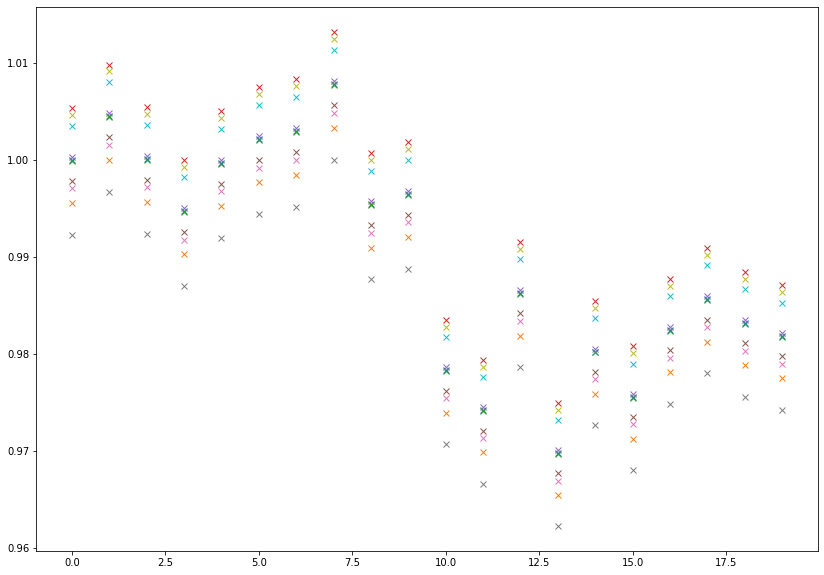

In [30]:
values = list(gama.values())

plt.figure(figsize=(14,10))
plt.plot(values, 'x')
plt.show()